In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from statsmodels.graphics.regressionplots import abline_plot

%matplotlib inline


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
yard             21597 non-null int64
ratio_15         21597 non-null float64
years_old        21597 non-null int64
2                21597 non-null uint8
3                21597 non-null uint8
4                21597 non-null uint8
5                21597 non-null uint8
dtypes: datetime64[ns](1), float64

In [20]:

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,yr_renovated,sqft_living15,sqft_lot15,yard,ratio_15,years_old,condition_2,condition_3,condition_4,condition_5
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,7,...,0.0,1340,5650,4470,0.880597,65,0,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,7,...,1991.0,1690,7639,4672,1.520710,69,0,1,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,6,...,NaN,2720,8062,9230,0.283088,87,0,1,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,7,...,0.0,1360,5000,3040,1.441176,55,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,8,...,0.0,1800,7503,6400,0.933333,33,0,1,0,0


In [14]:
df = pd.read_csv('data/kc_house_data.csv')
df.date = pd.to_datetime(df.date)
df.waterfront = df.waterfront.fillna(value = 0)
df = df.drop(columns = ['view','lat', 'long', 'zipcode', 'sqft_basement'])
#df.yr_renovated.fillna(value = 0, inplace = True) 
df['yard'] = df.sqft_lot - df.sqft_living
df['ratio_15'] = df.sqft_living/df.sqft_living15
df['years_old'] = 2020 - df.yr_built
s = pd.get_dummies(df.condition, drop_first = True, prefix = 'condition')
df = pd.concat([df, s], axis = 1)
df = df.drop(columns = ['condition'])
df.head()
y = df.price
X = df.drop(columns = ['price'])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)


0.0

In [16]:
formula = "price ~ sqft_living"
data_ols = pd.concat([X_train, y_train], axis = 1)

model_sqft = ols(formula= formula, data= data_ols).fit()
model_sqft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:09:49   Log-Likelihood:            -2.4032e+05
No. Observations:               17277   AIC:                         4.806e+05
Df Residuals:                   17275   BIC:                         4.807e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.57e+04   4993.714     -9.152      0.000   -5.55e+04   -3.59e+04
sqft_living   281.6056      2.189    128.634      0.000     277.315     285.897
==============================================================================
Omnibus:                    12287.594   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           502138.509
Skew:                           2.943   Prob(JB):                         0.00
Kurtosis:                      28.747   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

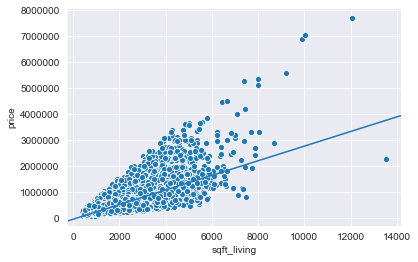

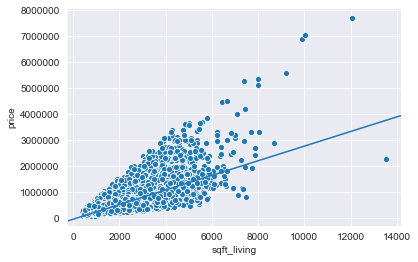

In [17]:
sns.set_style('darkgrid')
#fig = sm.graphics.plot_regress_exog(data_ols, "price")
fig, ax = plt.subplots()
sns.scatterplot(x = data_ols.sqft_living, y = data_ols.price)
abline_plot(model_results=model_sqft, ax=ax)

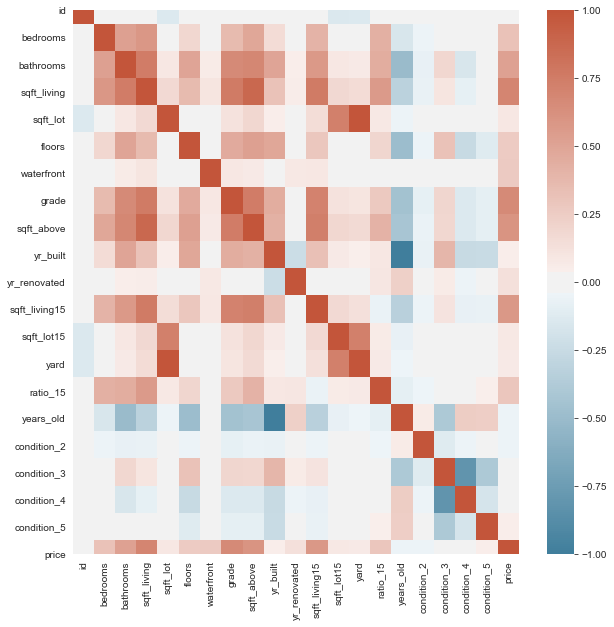

In [18]:

fig,ax = plt.subplots(figsize = (10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_ols.corr(), cmap = cmap)

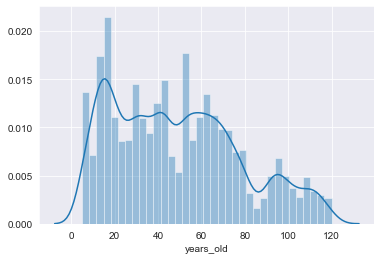

In [19]:
sns.distplot(df.years_old)

In [21]:
formula = "price ~ sqft_living + condition_2 + condition_3 + condition_4 + condition_5"
data_ols = pd.concat([X_train, y_train], axis = 1)

model_two = ols(formula= formula, data= data_ols).fit()
model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3396.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:11:03   Log-Likelihood:            -2.4021e+05
No. Observations:               17277   AIC:                         4.804e+05
Df Residuals:                   17271   BIC:                         4.805e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept        2e+04   5.77e+04      0.347      0.729   -9.31e+04    1.33e+05
sqft_living   283.7182      2.192    129.451      0.000     279.422     288.014
condition_2 -9.774e+04   6.19e+04     -1.578      0.114   -2.19e+05    2.36e+04
condition_3  -8.75e+04   5.78e+04     -1.515      0.130   -2.01e+05    2.57e+04
condition_4 -5.305e+04   5.78e+04     -0.918      0.359   -1.66e+05    6.03e+04
condition_5  1.868e+04   5.81e+04      0.321      0.748   -9.53e+04    1.33e+05
==============================================================================
Omnibus:                    12317.028   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513085.522
Skew:                           2.947   Prob(JB):                         0.00
Kurtosis:                      29.038   Cond. No.                     1.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""